# LOAD PACKAGES

In [66]:
# Load packages
import numpy as np  
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
print "Read in packages from numpy, pandas, sklearn, seaborn & matplotlib"

Read in packages from numpy, pandas, sklearn, seaborn & matplotlib


# PICKLING

In [67]:
from six.moves import cPickle as pickle
pickle_file = 'train_set.pickle'

## Read from Pickle

In [68]:
with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    ptrain_set = save['train_set']
    del save  # hint to help gc free up memory
    print('Loaded ptrain_set', ptrain_set.shape)
    
f.close()

('Loaded ptrain_set', (190080, 18))


## One Hot Encoding for POI, Week Day, Time Slot

In [24]:
ptrain_set = pd.concat([ptrain_set, pd.get_dummies(ptrain_set['poi_cluster'], prefix='poi')], axis=1)
ptrain_set = pd.concat([ptrain_set, pd.get_dummies(ptrain_set['week_day'], prefix='weekday')], axis=1)
ptrain_set = pd.concat([ptrain_set, pd.get_dummies(ptrain_set['time_slot'], prefix='ts')], axis=1)

In [71]:
"{0:08b}".format(7)

'00000111'

In [87]:
"{0:08b}".format(int(ptrain_set[['week_day']].values[0]))

'00000101'

In [88]:
len(ptrain_set[['week_day']].values)

190080

In [100]:
bin_values = []
    
    for n in range(0, 5):
        value = int(ptrain_set[['time_slot']].values[n])
        bin_values.append("{0:08b}".format(int(value)))

In [101]:
bin_values

['00000001', '00000010', '00000011', '00000100', '00000101']

In [ ]:
def binary_categories(**kwargs):
    col_name   = kwargs['col_name']
    prefix     = kwargs['prefix']
    num_bits   = kwargs['num_bits']
    
    bin_values = []
    
    for n in range(0, len(ptrain_set[[col_name]].values)):
        value = int(ptrain_set[['time_slot']].values[n])
        bin_values.append("{0:08b}".format(int(value)))
    
    for i in range(0, num_bits):
        ptrain_set[prefix + '_' + i] = 
    df1['e'] = Series(np.random.randn(sLength), index=df1.index)

# TRAIN / TEST SPLIT

In [50]:
# Split train / test data - for coarse training
# Dropping data from Jan 1 because it is a holiday
train_days     = range(2,16)
train_times    = range(39,140,4)
#train_times    = range(89,115,4)

test_days      = range(16, 22)
test_times     = range(39,140,4)
#test_times     = range(89,115,4)

X_train     = ptrain_set[(ptrain_set['num_day'].isin(train_days))    & (ptrain_set['time_slot'].isin(train_times))]
X_test      = ptrain_set[(ptrain_set['num_day'].isin(test_days))     & (ptrain_set['time_slot'].isin(test_times))]

print "Shape of X_train, X_test:", X_train.shape, X_test.shape, "\n\n"

Shape of X_train, X_test: (24024, 175) (10296, 175) 




## SCALING

In [51]:
# Scaling for input features
# Generate scaled features for train, validate & test sets

import warnings
warnings.filterwarnings('ignore')

r_predictors = ['time_slot', 'demand_t-1', 'demand_t-2', 'demand_t-3', 
                'poi_0', 'poi_1', 'poi_2', 'poi_3', 'poi_4', 'poi_5',
                'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
                'ts_39','ts_43','ts_47','ts_51','ts_55','ts_59','ts_63','ts_67','ts_71','ts_75','ts_79',
                'ts_83','ts_87','ts_91','ts_95','ts_99','ts_103','ts_107','ts_111','ts_115','ts_119','ts_123',
                'ts_127','ts_131','ts_135','ts_139',
                'congestion'] 

a_predictors = ['time_slot', 'supply_t-1', 'supply_t-2', 'supply_t-3', 
                'poi_0', 'poi_1', 'poi_2', 'poi_3', 'poi_4', 'poi_5',
                'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
                'ts_39','ts_43','ts_47','ts_51','ts_55','ts_59','ts_63','ts_67','ts_71','ts_75','ts_79',
                'ts_83','ts_87','ts_91','ts_95','ts_99','ts_103','ts_107','ts_111','ts_115','ts_119','ts_123',
                'ts_127','ts_131','ts_135','ts_139',
                'congestion'] 

rX_train = []
ry_train = []
aX_train = []
ay_train = []

rX_test = []
ry_test = []
aX_test = []
ay_test = []

# Normalize features - both training & test (withheld & final)
r_scaler = StandardScaler().fit(ptrain_set[r_predictors])
a_scaler = StandardScaler().fit(ptrain_set[a_predictors])

d_scaler = StandardScaler().fit(ptrain_set['demand'])
s_scaler = StandardScaler().fit(ptrain_set['supply'])

# Input Samples and Target Values for Demand(r), Supply(a)
# Demand
rX_train  = r_scaler.transform(X_train[r_predictors])
ry_train  = d_scaler.transform(X_train['demand'])

rX_test = r_scaler.transform(X_test[r_predictors])
ry_test = d_scaler.transform(X_test['demand'])

# Supply
aX_train = a_scaler.transform(X_train[a_predictors])
ay_train = s_scaler.transform(X_train['supply'])

aX_test = a_scaler.transform(X_test[a_predictors])
ay_test = s_scaler.transform(X_test['supply'])

Best Estimator (Demand):
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')
CV accuracy (Demand): -0.086 +/- 0.071
Best Estimator (Supply):
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')
CV accuracy (Supply): -0.078 +/- 0.068


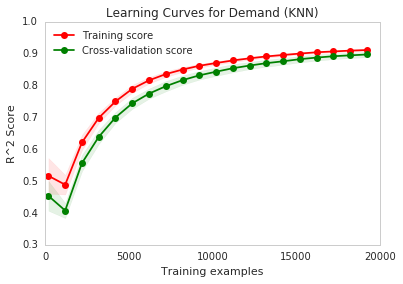

KeyboardInterrupt: 

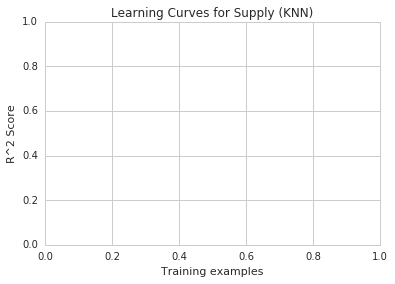

In [52]:
# Use GridSearchCV - Demand
# Specify parameters
#param_grid = {'n_neighbors'       : [3, 5, 7, 10, 15, 25],
param_grid = {'n_neighbors'       : [10, 15],
              'weights'           : ['uniform'],
              'metric'            : ['euclidean', 'minkowski']}

alg = KNeighborsRegressor()

# Use MAPE as scoring function
select_hyperparams(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                   rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                   alg=alg, alg_name='KNN', param_grid=param_grid, scoring_func=mape_scorer)

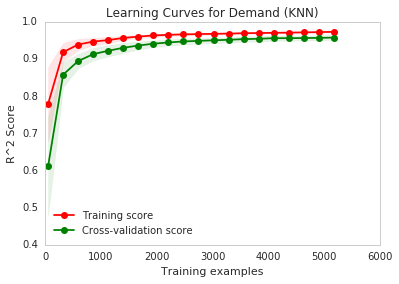

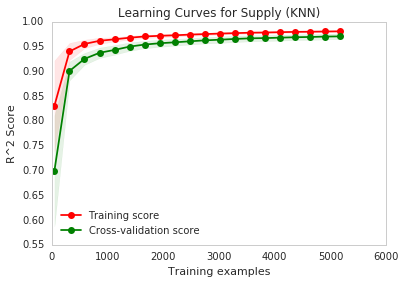


Training Demand Forecaster - KNN

Train Size: 4000.000 Train Score: 0.962 Test Score: 0.866
Train Size: 8000.000 Train Score: 0.976 Test Score: 0.952
Train Size: 12000.000 Train Score: 0.976 Test Score: 0.952
Train Size: 16000.000 Train Score: 0.976 Test Score: 0.952
Train Size: 20000.000 Train Score: 0.976 Test Score: 0.952
Train Size: 24024.000 Train Score: 0.976 Test Score: 0.952

Training Supply Forecaster - KNN

Train Size: 4000.000 Train Score: 0.976 Test Score: 0.859
Train Size: 8000.000 Train Score: 0.981 Test Score: 0.963
Train Size: 12000.000 Train Score: 0.981 Test Score: 0.963
Train Size: 16000.000 Train Score: 0.981 Test Score: 0.963
Train Size: 20000.000 Train Score: 0.981 Test Score: 0.963
Train Size: 24024.000 Train Score: 0.981 Test Score: 0.963


In [46]:
from sklearn.neighbors import KNeighborsRegressor

# KNN defaults to R^2 score
generate_learningcurves(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                        r_alg=KNeighborsRegressor(), a_alg=KNeighborsRegressor(), alg_name="KNN")

generate_traintestscores(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                         rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                         r_alg=KNeighborsRegressor(), a_alg=KNeighborsRegressor(), alg_name="KNN")

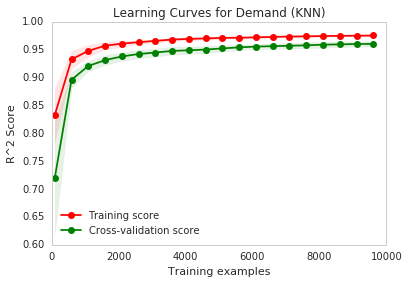

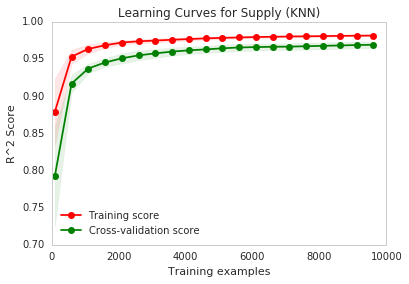


Training Demand Forecaster - KNN

Train Size: 4000.000 Train Score: 0.958 Test Score: 0.839
Train Size: 8000.000 Train Score: 0.970 Test Score: 0.857
Train Size: 12000.000 Train Score: 0.976 Test Score: 0.954
Train Size: 16000.000 Train Score: 0.976 Test Score: 0.954
Train Size: 20000.000 Train Score: 0.976 Test Score: 0.954
Train Size: 24024.000 Train Score: 0.976 Test Score: 0.954

Training Supply Forecaster - KNN

Train Size: 4000.000 Train Score: 0.972 Test Score: 0.853
Train Size: 8000.000 Train Score: 0.978 Test Score: 0.872
Train Size: 12000.000 Train Score: 0.982 Test Score: 0.965
Train Size: 16000.000 Train Score: 0.982 Test Score: 0.965
Train Size: 20000.000 Train Score: 0.982 Test Score: 0.965
Train Size: 24024.000 Train Score: 0.982 Test Score: 0.965


In [44]:
from sklearn.neighbors import KNeighborsRegressor

# KNN defaults to R^2 score
generate_learningcurves(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                        r_alg=KNeighborsRegressor(), a_alg=KNeighborsRegressor(), alg_name="KNN")

generate_traintestscores(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                         rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                         r_alg=KNeighborsRegressor(), a_alg=KNeighborsRegressor(), alg_name="KNN")

## SCORES

In [27]:
# Calculate the MAPE Score
def mape_score(exp, pred, q):
    
    # q = (num_days * num_slots) -1
    mape = 0.0
    n = 66.0
    
    for gap, gapX in zip(exp, pred):
        if gap > 0:
            mape += 1.0 * abs((gap-gapX)/gap)
    return (mape/(n*q))

# Print Scores & Present as a table - Mean Squared, R2, MAPE
def print_score(y_train, y_pred_train, y_test, y_pred_test):
    
    m2score_train    = metrics.mean_squared_error(y_train,    y_pred_train)
    m2score_test     = metrics.mean_squared_error(y_test,     y_pred_test)


    r2score_train    = metrics.r2_score(y_train,    y_pred_train)
    r2score_test     = metrics.r2_score(y_test,     y_pred_test)

    mpscore_train    = mape_score(y_train,    y_pred_train, 363)
    mpscore_test     = mape_score(y_test,     y_pred_test, 155)


    sets_list = ["TRAIN", "TEST"]

    m2_scores = [m2score_train, m2score_test]
    r2_scores = [r2score_train, r2score_test]
    mp_scores = [mpscore_train, mpscore_test]


    print '\t\tMEAN^2\t\tR2\t\tMAPE'

    for s, m, r, mp in zip(sets_list, m2_scores, r2_scores, mp_scores):
        print '{0:10}\t{1:.2f}\t\t{2:.2f}\t\t{3:.2f}' .format(s, m, r, mp)

        
# Evaluate Scores & Present as a table - Mean Squared, R2, MAPE
def eval_score(y_train, y_pred_train, y_test, y_pred_test):
    
    m2score_train    = metrics.mean_squared_error(y_train,    y_pred_train)
    m2score_test     = metrics.mean_squared_error(y_test,     y_pred_test)


    r2score_train    = metrics.r2_score(y_train,    y_pred_train)
    r2score_test     = metrics.r2_score(y_test,     y_pred_test)

    mpscore_train    = mape_score(y_train,    y_pred_train, 363)
    mpscore_test     = mape_score(y_test,     y_pred_test, 155)


    sets_list = ["TRAIN", "TEST"]

    m2_scores = [m2score_train, m2score_test]
    r2_scores = [r2score_train, r2score_test]
    mp_scores = [mpscore_train, mpscore_test]


    print '\t\tMEAN^2\t\tR2\t\tMAPE'


    for s, m, r, mp in zip(sets_list, m2_scores, r2_scores, mp_scores):
        print '{0:10}\t{1:.2f}\t\t{2:.2f}\t\t{3:.2f}' .format(s, m, r, mp)

In [28]:
from sklearn.metrics import make_scorer
mape_scorer = make_scorer(mape_score, greater_is_better=False, q=363)

In [29]:
# Use fit function to generate predictions for train and test sets
# Evaluate scores and print results
# Used for demand, supply predictions
def predict_score(train_set, test_set, predictors, exp_col, fitfunc, *fitargs):

    # Generate dataframe for train & test
    Xtrain_df    = train_set[predictors]
    Xtest_df     = test_set[predictors]
    
    # Generate predictions for train & test
    y_pred_train    = fitfunc(Xtrain_df,    *fitargs)
    y_pred_test     = fitfunc(Xtest_df,     *fitargs)

    # Extract expected train & test values
    y_train    = train_set[exp_col]
    y_test     = test_set[exp_col]

    m2score_train    = metrics.mean_squared_error(y_train,    y_pred_train)
    m2score_test     = metrics.mean_squared_error(y_test,     y_pred_test)


    r2score_train    = metrics.r2_score(y_train,    y_pred_train)
    r2score_test     = metrics.r2_score(y_test,     y_pred_test)

    mpscore_train    = mape_score(y_train,    y_pred_train, 363)
    mpscore_test     = mape_score(y_test,     y_pred_test, 155)


    sets_list = ["TRAIN", "TEST"]

    m2_scores = [m2score_train, m2score_test]
    r2_scores = [r2score_train, r2score_test]
    mp_scores = [mpscore_train, mpscore_test]


    print '\t\tMEAN^2\t\tR2\t\tMAPE'


    for s, m, r, mp in zip(sets_list, m2_scores, r2_scores, mp_scores):
        print '{0:10}\t{1:.2f}\t\t{2:.2f}\t\t{3:.2f}' .format(s, m, r, mp)
    
    return(y_pred_train, y_pred_test)

## LEARNING CURVES

In [30]:
# Generates training vs cross-validation curves

print(__doc__)

from sklearn import cross_validation
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("R^2 Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


## DEMAND, SUPPLY PREDICTIONS & GAP FORECASTING

In [31]:
def analyze_error(ry_pred_train, ry_pred_test,
                  ay_pred_train, ay_pred_test,
                  gapy_pred_train, gapy_pred_test):
    
    Xerr_train = pd.DataFrame()
    Xerr_test  = pd.DataFrame()
    
    Xerr_train = X_train.copy()
    Xerr_test  = X_test.copy()
    
    # Drop columns that will not be used for analysis
    Xerr_train.drop(['weather', 'temperature', 'pollution', 
                     'demand_t-1', 'demand_t-2', 'demand_t-3', 
                     'supply_t-1', 'supply_t-2', 'supply_t-3'],
                    axis=1, inplace=True)
    
    Xerr_test.drop(['weather', 'temperature', 'pollution', 
                    'demand_t-1', 'demand_t-2', 'demand_t-3', 
                    'supply_t-1', 'supply_t-2', 'supply_t-3'], 
                   axis=1, inplace=True)
    
    
    # Create new columns that store errors
    Xerr_train['r_error']   = X_train['demand'] - ry_pred_train
    Xerr_train['a_error']   = X_train['supply'] - ay_pred_train
    Xerr_train['gap_error'] = X_train['gap']    - gapy_pred_train
    
    Xerr_test['r_error']   = X_test['demand'] - ry_pred_test
    Xerr_test['a_error']   = X_test['supply'] - ay_pred_test
    Xerr_test['gap_error'] = X_test['gap']    - gapy_pred_test
    
    print '\nTrain error correlation matrix:\n', Xerr_train.corr()
    print '\nTest error correlation matrix:\n', Xerr_test.corr()    
  
    print '\nTest Error Joint Plot\n'
    for y in ['demand', 'gap', 'supply', 'district_id', 'num_day', 'time_slot', 'week_day', 'poi_cluster', 'congestion']:
        g = sns.jointplot('gap_error', y, data=Xerr_train, kind="reg",color="r", size=3)
    plt.show()
    
    print '\nTrain Error Joint Plot\n'
    for y in ['demand', 'gap', 'supply', 'district_id', 'num_day', 'time_slot', 'week_day', 'poi_cluster', 'congestion']:
        g = sns.jointplot('gap_error', y, data=Xerr_test, kind="reg",color="r", size=3)
    plt.show()

In [48]:
# Generate Demand Supply Gap Metrics based on provided fit functions
# Assumes expected values for demand, supply, gap are in namesake columns
def gap_estimater(**kwargs):
    
    rX_train     = kwargs["rX_train"]
    rX_test      = kwargs["rX_test"]
    aX_train     = kwargs["aX_train"]
    aX_test      = kwargs["aX_test"]
    r_fitfunc    = kwargs["r_fitfunc"]
    a_fitfunc    = kwargs["a_fitfunc"]
    
    print "\n\nDEMAND FORECASTING"
    print     "=================="

    # Generate predictions for train & test sets
    ry_pred_train    = d_scaler.inverse_transform(r_fitfunc.predict(rX_train))
    ry_pred_test     = d_scaler.inverse_transform(r_fitfunc.predict(rX_test))

    # Extract expected train & test values
    ry_train    = X_train['demand']
    ry_test     = X_test['demand']

    # Evaluate scores and print results
    print_score(ry_train, ry_pred_train, ry_test, ry_pred_test)

    print "\n\nSUPPLY FORECASTING"
    print     "=================="

    # Generate predictions for train & test sets
    ay_pred_train    = s_scaler.inverse_transform(a_fitfunc.predict(aX_train))
    ay_pred_test     = s_scaler.inverse_transform(a_fitfunc.predict(aX_test))

    # Extract expected train & test values
    ay_train    = X_train['supply']
    ay_test     = X_test['supply']

    # Evaluate scores and print results
    print_score(ay_train, ay_pred_train, ay_test, ay_pred_test)

    print "\n\nGAP FORECASTING"
    print     "==============="

    g_predictors = ['time_slot', 'supply_t-1', 'supply_t-2', 'supply_t-3', 
                    'poi_0', 'poi_1', 'poi_2', 'poi_3', 'poi_4', 'poi_5',
                    'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
                    'ts_39','ts_43','ts_47','ts_51','ts_55','ts_59','ts_63','ts_67','ts_71','ts_75','ts_79',
                    'ts_83','ts_87','ts_91','ts_95','ts_99','ts_103','ts_107','ts_111','ts_115','ts_119','ts_123',
                    'ts_127','ts_131','ts_135','ts_139',
                    'congestion'] 

    gX_train = []
    gy_train = []
    gX_test  = []
    gy_test  = []

    # Normalize features - both training & test (withheld & final)
    gap_scaler = StandardScaler().fit(ptrain_set[g_predictors])
    g_scaler   = StandardScaler().fit(ptrain_set['gap'])

    # Input Samples and Target Values for Gap(g)
    gX_train  = gap_scaler.transform(X_train[g_predictors])
    gy_train  = g_scaler.transform(X_train['gap'])

    gX_test   = gap_scaler.transform(X_test[g_predictors])
    gy_test   = g_scaler.transform(X_test['gap'])

    # Use nested cross validation - 5x2 cross validation
    alg          = KNeighborsRegressor()
    param_grid   = {'n_neighbors'       : [10, 15],
                    'weights'           : ['uniform'],
                    'metric'            : ['euclidean', 'minkowski']}
    scoring_func = mape_scorer
    
    g_gs   = GridSearchCV(estimator=alg,
                        param_grid=param_grid,
                        scoring=scoring_func,
                        cv=2,
                        n_jobs=-1)

    scores = cross_val_score(estimator=g_gs,
                             X=gX_train,
                             y=gy_train,
                             scoring=scoring_func,
                             cv=5)

    g_gs  = g_gs.fit(X=gX_train, y=gy_train)

    print 'Best Estimator (Demand):\n', g_gs.best_estimator_
    print('CV accuracy (Demand): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    
    # Generate predictions for train & test sets
    gapy_pred_train    = g_scaler.inverse_transform(g_fitfunc.predict(gX_train))
    gapy_pred_test     = g_scaler.inverse_transform(g_fitfunc.predict(gy_test))

    gapy_train    = X_train['gap']
    gapy_test     = X_test['gap']

    print_score(gapy_train, gapy_pred_train, gapy_test, gapy_pred_test)
    
    analyze_error(ry_pred_train, ry_pred_test,
                  ay_pred_train, ay_pred_test,
                  gapy_pred_train, gapy_pred_test)
    
    return


# Generate Demand Supply Gap Metrics based on provided fit functions
# Assumes expected values for demand, supply, gap are in namesake columns
def gap_forecast(**kwargs):
    
    X_train      = kwargs["train_set"]
    X_test       = kwargs["test_set"]
    r_predictors = kwargs["demand_predictors"]
    a_predictors = kwargs["supply_predictors"]
    r_fitfunc    = kwargs["rfit_func"]
    r_fitargs    = kwargs["rfit_args"]
    a_fitfunc    = kwargs["afit_func"]
    a_fitargs    = kwargs["afit_args"]
    
    print "\n\nDEMAND FORECASTING"
    print     "=================="

    ry_pred_train, ry_pred_test = predict_score(X_train, X_test, r_predictors, 'demand', r_fitfunc, *r_fitargs)

    print "\n\nSUPPLY FORECASTING"
    print     "=================="

    ay_pred_train, ay_pred_test = predict_score(X_train, X_test, a_predictors, 'supply', a_fitfunc, *a_fitargs)

    print "\n\nGAP FORECASTING"
    print     "==============="

    gapy_pred_train    = [r - a for r, a in zip(ry_pred_train,    ay_pred_train)]
    gapy_pred_test     = [r - a for r, a in zip(ry_pred_test,     ay_pred_test)]

    gapy_train    = X_train['gap']
    gapy_test     = X_test['gap']

    eval_score(gapy_train, gapy_pred_train, gapy_test, gapy_pred_test)
    
    return

In [33]:
# Generate learning curves by varying training sizes
# Use Training vs Cross-validation curves
def generate_learningcurves(**kwargs):    
   
    rX_train      = kwargs["rX_train"]
    ry_train      = kwargs["ry_train"]
    aX_train      = kwargs["aX_train"]
    ay_train      = kwargs["ay_train"]
        
    r_alg         = kwargs["r_alg"]
    a_alg         = kwargs["a_alg"]
    alg_name      = kwargs["alg_name"]
          
    # Plot learning curve - Demand
    X, y = rX_train, ry_train

    title = 'Learning Curves for Demand (' + alg_name + ')'

    # Cross validation with 25 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=25, test_size=0.2, random_state=0)

    estimator = r_alg
    plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.01, 1.0, 20))
    plt.show()
    
    # Plot learning curve - Supply
    X, y = aX_train, ay_train

    title = 'Learning Curves for Supply (' + alg_name + ')'

    # Cross validation with 25 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=25, test_size=0.2, random_state=0)

    estimator = a_alg
    plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.01, 1.0, 20))
    plt.show()

In [34]:
# Generate learning curves by varying training sizes
# Use Training vs Cross-validation curves
def generate_traintestscores(**kwargs):    
   
    rX_train      = kwargs["rX_train"]
    ry_train      = kwargs["ry_train"]
    aX_train      = kwargs["aX_train"]
    ay_train      = kwargs["ay_train"]
    
    rX_test       = kwargs["rX_test"]
    ry_test       = kwargs["ry_test"]
    aX_test       = kwargs["aX_test"]
    ay_test       = kwargs["ay_test"]
        
    r_alg         = kwargs["r_alg"]
    a_alg         = kwargs["a_alg"]
    alg_name      = kwargs["alg_name"]
    
    # Create training set of increasing sizes
    train_size_set = [4000, 8000, 12000, 16000, 20000, 24024]

    Xr_train_set = []
    yr_train_set = []
    Xa_train_set = []
    ya_train_set = []
    
    Xr_test = rX_test
    yr_test = ry_test
    Xa_test = aX_test
    ya_test = ay_test

    for size in train_size_set: 
        Xr_train_set.append(rX_train[:size])
        yr_train_set.append(ry_train[:size])
        Xa_train_set.append(aX_train[:size])
        ya_train_set.append(ay_train[:size])
    
    # Train Demand Forecaster
    print ('\nTraining Demand Forecaster - {}\n' .format(alg_name))

    for train_size, Xr_train, yr_train in zip(train_size_set, Xr_train_set, yr_train_set):
        clf = r_alg.fit(Xr_train, yr_train)
    
        # Scores
        train_score = clf.score(Xr_train, yr_train)
        test_score  = clf.score(Xr_test, yr_test)
        print ('Train Size: {0:.3f} Train Score: {1:.3f} Test Score: {2:.3f}' .format(train_size, train_score, test_score))
        
    # Train Supply Forecaster
    print ('\nTraining Supply Forecaster - {}\n' .format(alg_name))

    for train_size, Xa_train, ya_train in zip(train_size_set, Xa_train_set, ya_train_set):
        clf = a_alg.fit(Xa_train, ya_train)
    
        # Scores
        train_score = clf.score(Xa_train, ya_train)
        test_score  = clf.score(Xa_test, ya_test)
        print ('Train Size: {0:.3f} Train Score: {1:.3f} Test Score: {2:.3f}' .format(train_size, train_score, test_score))

In [35]:
def select_hyperparams(**kwargs):
    
    rX_train      = kwargs['rX_train']
    ry_train      = kwargs['ry_train']
    aX_train      = kwargs['aX_train']
    ay_train      = kwargs['ay_train']
    
    rX_test       = kwargs["rX_test"]
    ry_test       = kwargs["ry_test"]
    aX_test       = kwargs["aX_test"]
    ay_test       = kwargs["ay_test"]
    
    alg           = kwargs['alg']
    alg_name      = kwargs['alg_name']
    param_grid    = kwargs['param_grid']
    scoring_func  = kwargs['scoring_func']
    
    # DEMAND
    # Use nested cross validation - 5x2 cross validation

    r_gs = GridSearchCV(estimator=alg,
                  param_grid=param_grid,
                  scoring=scoring_func,
                  cv=2,
                  n_jobs=-1)

    scores = cross_val_score(estimator=r_gs,
                         X=rX_train,
                         y=ry_train,
                         scoring=scoring_func,
                         cv=5)

    r_gs = r_gs.fit(X=rX_train,
                y=ry_train)

    print 'Best Estimator (Demand):\n', r_gs.best_estimator_
    print('CV accuracy (Demand): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    
    # SUPPLY
    # Use nested cross validation - 5x2 cross validation
    # Use Mean Squared Error for Scoring
    # Decision Trees only support MSE

    a_gs = GridSearchCV(estimator=alg,
                  param_grid=param_grid,
                  scoring=scoring_func,
                  cv=2,
                  n_jobs=-1)

    scores = cross_val_score(estimator=a_gs,
                         X=aX_train,
                         y=ay_train,
                         scoring=scoring_func,
                         cv=5)

    a_gs = a_gs.fit(X=aX_train,
                y=ay_train)

    print 'Best Estimator (Supply):\n', a_gs.best_estimator_
    print('CV accuracy (Supply): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    
    # Generate Learning Curves - Demand & Supply
    generate_learningcurves(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                            r_alg=r_gs.best_estimator_, a_alg=a_gs.best_estimator_, alg_name=alg_name)
    
    generate_traintestscores(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                             rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                             r_alg=r_gs.best_estimator_, a_alg=a_gs.best_estimator_, alg_name=alg_name)
    
    # Print Scores   
    gap_estimater(rX_train=rX_train, rX_test=rX_test, aX_train=aX_train, aX_test=aX_test, 
                 r_fitfunc=r_gs, a_fitfunc=a_gs)

# DECISION TREES

## Default Parameters

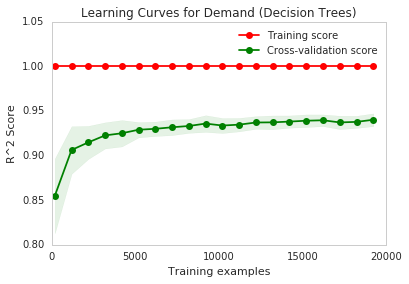

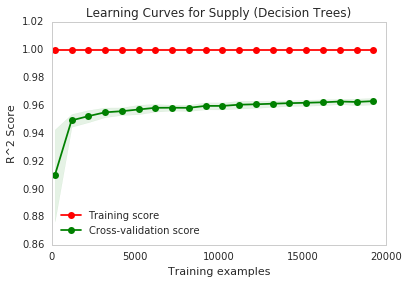


Training Demand Forecaster - Decision Trees

Train Size: 4000.000 Train Score: 1.000 Test Score: 0.875
Train Size: 8000.000 Train Score: 1.000 Test Score: 0.812
Train Size: 12000.000 Train Score: 1.000 Test Score: 0.903
Train Size: 16000.000 Train Score: 1.000 Test Score: 0.928
Train Size: 20000.000 Train Score: 1.000 Test Score: 0.929
Train Size: 24024.000 Train Score: 1.000 Test Score: 0.932

Training Supply Forecaster - Decision Trees

Train Size: 4000.000 Train Score: 1.000 Test Score: 0.919
Train Size: 8000.000 Train Score: 1.000 Test Score: 0.909
Train Size: 12000.000 Train Score: 1.000 Test Score: 0.950
Train Size: 16000.000 Train Score: 1.000 Test Score: 0.950
Train Size: 20000.000 Train Score: 1.000 Test Score: 0.963
Train Size: 24024.000 Train Score: 1.000 Test Score: 0.964


In [82]:
from sklearn.tree import DecisionTreeRegressor

# Decision Trees only supports MSE score for deciding splits
generate_learningcurves(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                        r_alg=DecisionTreeRegressor(), a_alg=DecisionTreeRegressor(), alg_name="Decision Trees")

generate_traintestscores(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                         rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                         r_alg=DecisionTreeRegressor(), a_alg=DecisionTreeRegressor(), alg_name="Decision Trees")

## Hyper Parameter Selection

Best Estimator (Demand):
DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=1.0,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')
CV accuracy (Demand): -0.036 +/- 0.025
Best Estimator (Supply):
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=0.5,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')
CV accuracy (Supply): -0.035 +/- 0.026


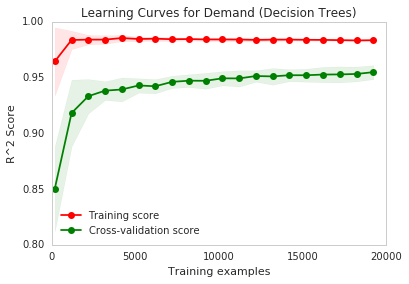

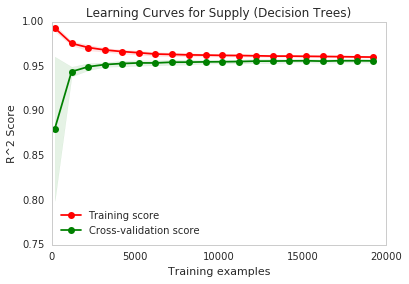


Training Demand Forecaster - Decision Trees

Train Size: 4000.000 Train Score: 0.983 Test Score: 0.884
Train Size: 8000.000 Train Score: 0.979 Test Score: 0.829
Train Size: 12000.000 Train Score: 0.976 Test Score: 0.936
Train Size: 16000.000 Train Score: 0.975 Test Score: 0.936
Train Size: 20000.000 Train Score: 0.983 Test Score: 0.948
Train Size: 24024.000 Train Score: 0.983 Test Score: 0.948

Training Supply Forecaster - Decision Trees

Train Size: 4000.000 Train Score: 0.962 Test Score: 0.874
Train Size: 8000.000 Train Score: 0.946 Test Score: 0.917
Train Size: 12000.000 Train Score: 0.952 Test Score: 0.956
Train Size: 16000.000 Train Score: 0.952 Test Score: 0.956
Train Size: 20000.000 Train Score: 0.959 Test Score: 0.959
Train Size: 24024.000 Train Score: 0.960 Test Score: 0.960


DEMAND FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	182.80		0.98		0.35
TEST      	888.14		0.95		0.37


SUPPLY FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	278.59		0.96		0.40
TEST      	328.02		0.96		0.40


GA

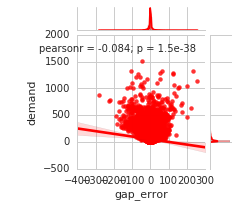

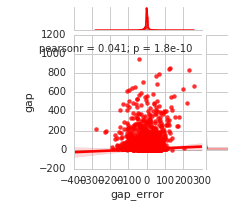

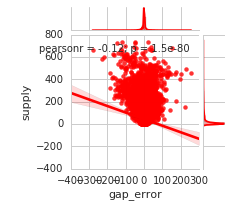

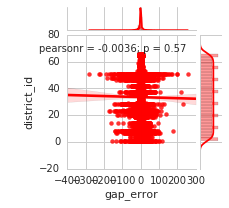

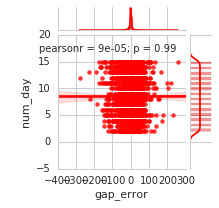

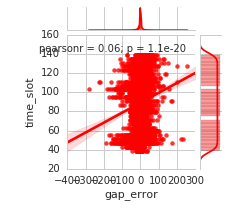

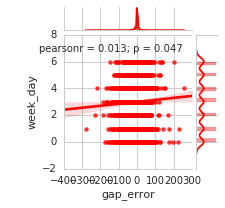

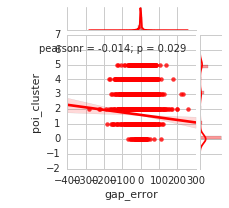

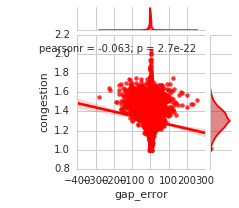


Train Error Joint Plot



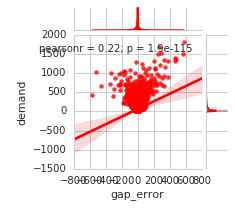

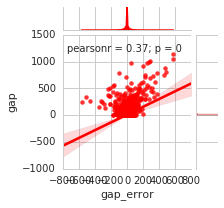

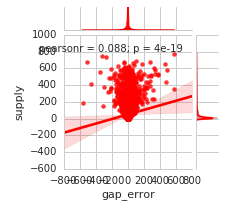

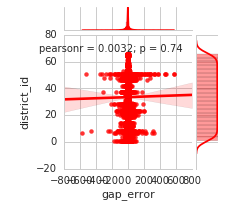

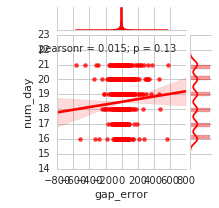

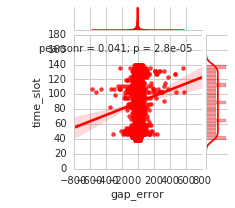

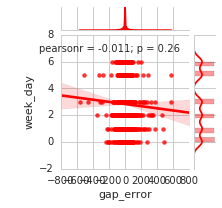

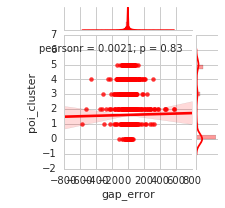

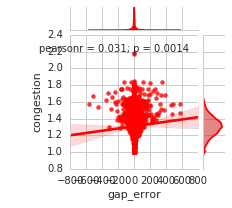

In [83]:
# Use GridSearchCV - Demand
# Specify parameters
param_grid = {'max_features'      : [0.25, 0.5, 0.75, 1.0],
              'max_depth'         : [5, 10, 15, 20, 25],
              'min_samples_split' : [2, 3, 4, 5, 10],
              'random_state'      : [0]}
             
alg = DecisionTreeRegressor()

# Only mse is supported for the DecisionTreeRegressor
# Use MAPE as scoring function for GridSearchCV, cross_val_score
select_hyperparams(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                   rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                   alg=alg, alg_name='Decision Trees', param_grid=param_grid, scoring_func=mape_scorer)

# K NEAREST NEIGHBORS

## Default Parameters

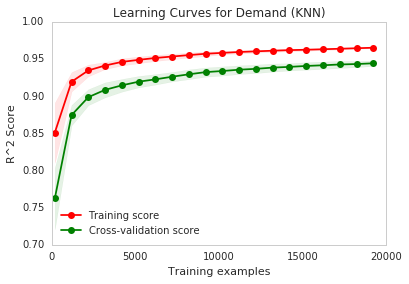

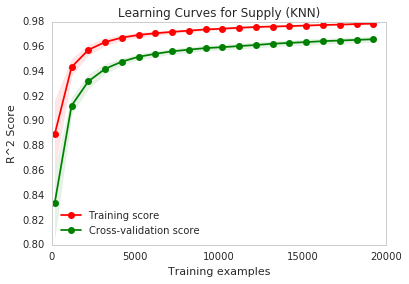


Training Demand Forecaster - KNN

Train Size: 4000.000 Train Score: 0.947 Test Score: 0.851
Train Size: 8000.000 Train Score: 0.947 Test Score: 0.855
Train Size: 12000.000 Train Score: 0.960 Test Score: 0.891
Train Size: 16000.000 Train Score: 0.961 Test Score: 0.895
Train Size: 20000.000 Train Score: 0.966 Test Score: 0.938
Train Size: 24024.000 Train Score: 0.967 Test Score: 0.938

Training Supply Forecaster - KNN

Train Size: 4000.000 Train Score: 0.968 Test Score: 0.850
Train Size: 8000.000 Train Score: 0.964 Test Score: 0.868
Train Size: 12000.000 Train Score: 0.973 Test Score: 0.952
Train Size: 16000.000 Train Score: 0.973 Test Score: 0.953
Train Size: 20000.000 Train Score: 0.979 Test Score: 0.969
Train Size: 24024.000 Train Score: 0.980 Test Score: 0.970


In [36]:
from sklearn.neighbors import KNeighborsRegressor

# KNN defaults to R^2 score
generate_learningcurves(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                        r_alg=KNeighborsRegressor(), a_alg=KNeighborsRegressor(), alg_name="KNN")

generate_traintestscores(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                         rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                         r_alg=KNeighborsRegressor(), a_alg=KNeighborsRegressor(), alg_name="KNN")

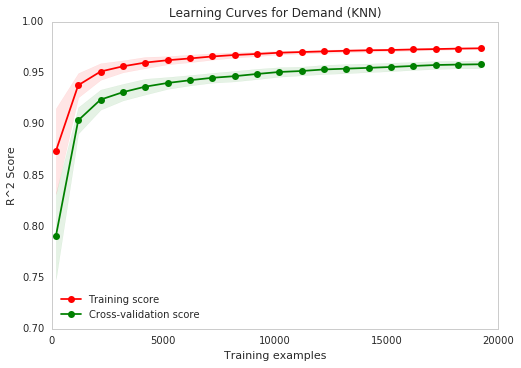

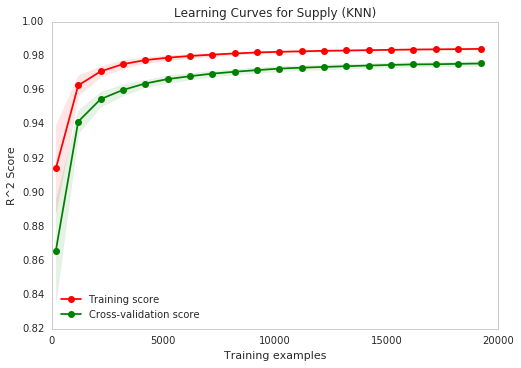


Training Demand Forecaster - KNN

Train Size: 4000.000 Train Score: 0.967 Test Score: 0.873
Train Size: 8000.000 Train Score: 0.965 Test Score: 0.871
Train Size: 12000.000 Train Score: 0.969 Test Score: 0.902
Train Size: 16000.000 Train Score: 0.970 Test Score: 0.904
Train Size: 20000.000 Train Score: 0.974 Test Score: 0.951
Train Size: 24024.000 Train Score: 0.975 Test Score: 0.951

Training Supply Forecaster - KNN

Train Size: 4000.000 Train Score: 0.982 Test Score: 0.863
Train Size: 8000.000 Train Score: 0.976 Test Score: 0.887
Train Size: 12000.000 Train Score: 0.979 Test Score: 0.957
Train Size: 16000.000 Train Score: 0.978 Test Score: 0.958
Train Size: 20000.000 Train Score: 0.984 Test Score: 0.974
Train Size: 24024.000 Train Score: 0.985 Test Score: 0.974


In [16]:
from sklearn.neighbors import KNeighborsRegressor

# KNN defaults to R^2 score
generate_learningcurves(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                        r_alg=KNeighborsRegressor(), a_alg=KNeighborsRegressor(), alg_name="KNN")

generate_traintestscores(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                         rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                         r_alg=KNeighborsRegressor(), a_alg=KNeighborsRegressor(), alg_name="KNN")

## Hyper Parameter Selection

Best Estimator (Demand):
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
CV accuracy (Demand): -0.051 +/- 0.043
Best Estimator (Supply):
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
CV accuracy (Supply): -0.040 +/- 0.033


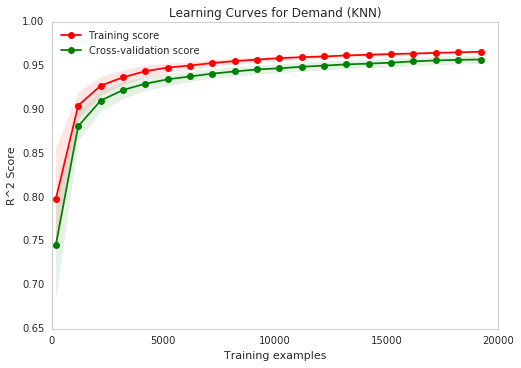

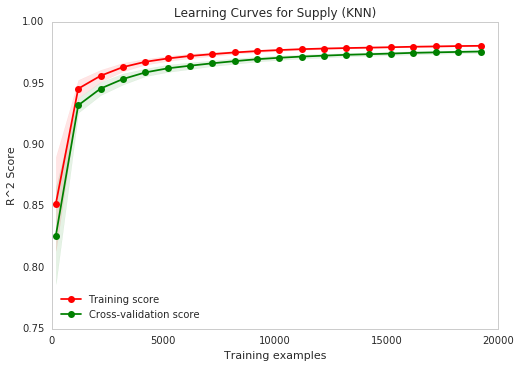


Training Demand Forecaster - KNN

Train Size: 4000.000 Train Score: 0.957 Test Score: 0.864
Train Size: 8000.000 Train Score: 0.955 Test Score: 0.869
Train Size: 12000.000 Train Score: 0.959 Test Score: 0.901
Train Size: 16000.000 Train Score: 0.960 Test Score: 0.903
Train Size: 20000.000 Train Score: 0.966 Test Score: 0.950
Train Size: 24024.000 Train Score: 0.968 Test Score: 0.950

Training Supply Forecaster - KNN

Train Size: 4000.000 Train Score: 0.976 Test Score: 0.857
Train Size: 8000.000 Train Score: 0.970 Test Score: 0.882
Train Size: 12000.000 Train Score: 0.974 Test Score: 0.958
Train Size: 16000.000 Train Score: 0.974 Test Score: 0.959
Train Size: 20000.000 Train Score: 0.981 Test Score: 0.975
Train Size: 24024.000 Train Score: 0.981 Test Score: 0.975


DEMAND FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	353.51		0.97		0.40
TEST      	866.71		0.95		0.43


SUPPLY FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	129.81		0.98		0.34
TEST      	206.53		0.97		0.37


GAP FORECASTING
		MEAN^2

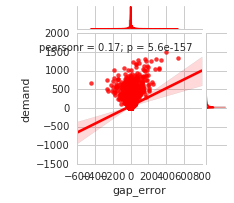

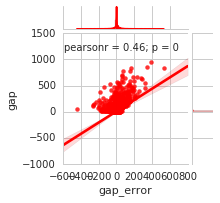

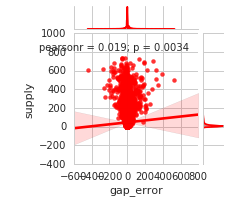

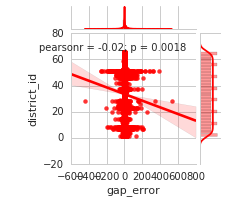

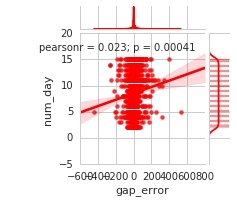

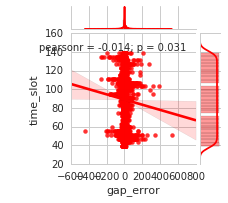

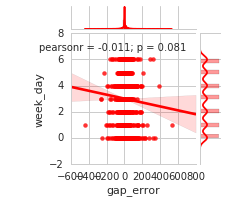

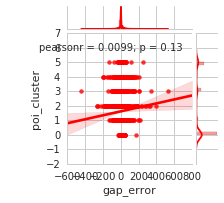

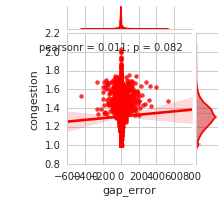


Train Error Joint Plot



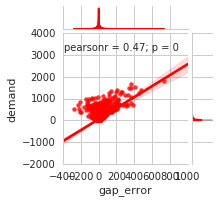

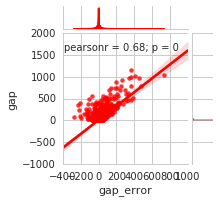

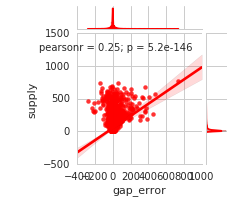

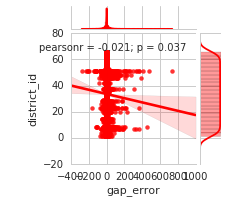

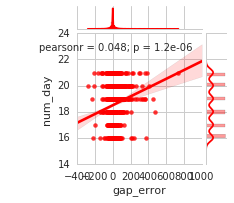

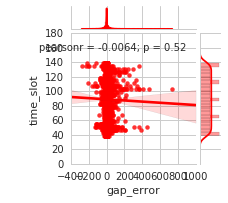

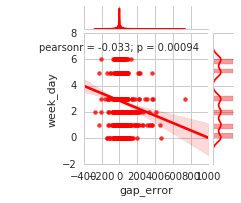

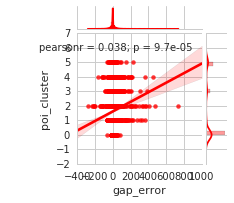

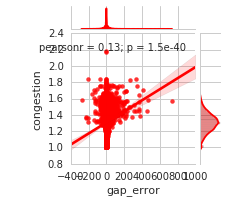

In [17]:
# Use GridSearchCV - Demand
# Specify parameters
#param_grid = {'n_neighbors'       : [3, 5, 7, 10, 15, 25],
param_grid = {'n_neighbors'       : [10, 15],
              'weights'           : ['uniform'],
              'metric'            : ['euclidean', 'minkowski']}

alg = KNeighborsRegressor()

# Use MAPE as scoring function
select_hyperparams(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                   rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                   alg=alg, alg_name='KNN', param_grid=param_grid, scoring_func=mape_scorer)

Best Estimator (Demand):
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
CV accuracy (Demand): -0.049 +/- 0.043
Best Estimator (Supply):
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
CV accuracy (Supply): -0.039 +/- 0.033


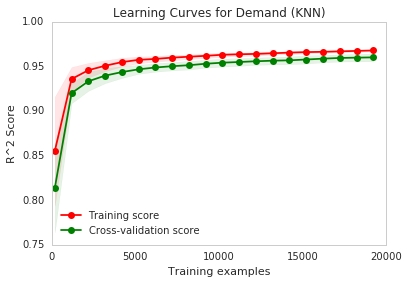

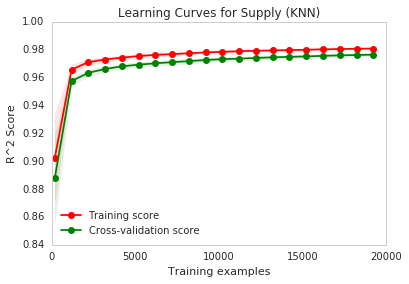


Training Demand Forecaster - KNN

Train Size: 4000.000 Train Score: 0.958 Test Score: 0.896
Train Size: 8000.000 Train Score: 0.955 Test Score: 0.900
Train Size: 12000.000 Train Score: 0.960 Test Score: 0.923
Train Size: 16000.000 Train Score: 0.961 Test Score: 0.923
Train Size: 20000.000 Train Score: 0.968 Test Score: 0.954
Train Size: 24024.000 Train Score: 0.969 Test Score: 0.954

Training Supply Forecaster - KNN

Train Size: 4000.000 Train Score: 0.977 Test Score: 0.923
Train Size: 8000.000 Train Score: 0.970 Test Score: 0.930
Train Size: 12000.000 Train Score: 0.974 Test Score: 0.967
Train Size: 16000.000 Train Score: 0.974 Test Score: 0.968
Train Size: 20000.000 Train Score: 0.981 Test Score: 0.975
Train Size: 24024.000 Train Score: 0.981 Test Score: 0.975


DEMAND FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	340.38		0.97		0.40
TEST      	796.50		0.95		0.43


SUPPLY FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	129.47		0.98		0.34
TEST      	201.44		0.98		0.37


GAP FORECASTING
		MEAN^2

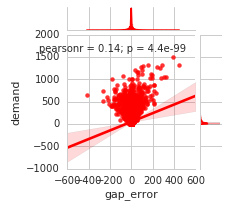

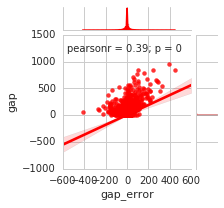

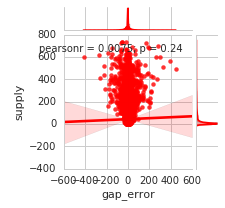

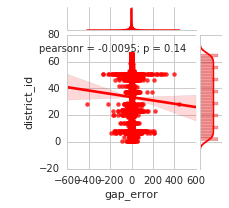

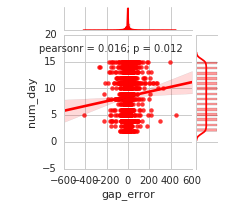

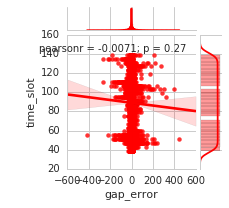

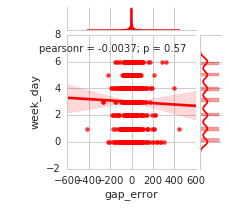

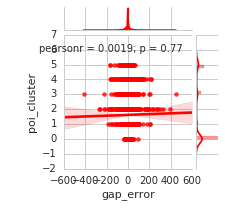

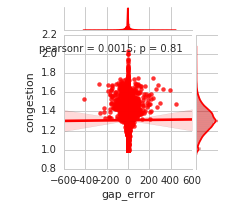


Train Error Joint Plot



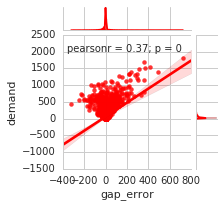

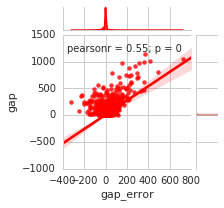

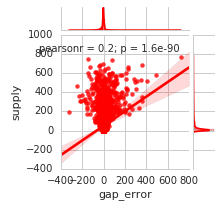

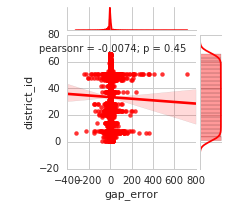

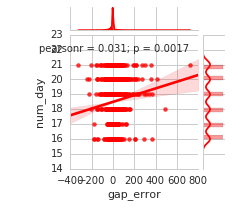

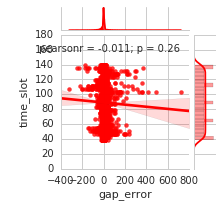

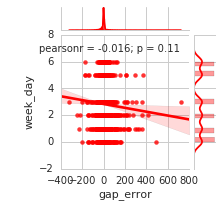

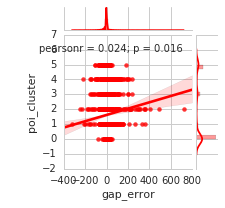

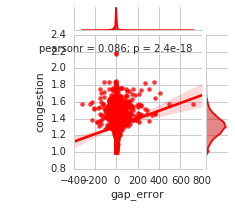

In [85]:
# Use GridSearchCV - Demand
# Specify parameters
#param_grid = {'n_neighbors'       : [3, 5, 7, 10, 15, 25],
param_grid = {'n_neighbors'       : [10, 15],
              'weights'           : ['uniform'],
              'metric'            : ['euclidean', 'minkowski']}

alg = KNeighborsRegressor()

# Use MAPE as scoring function
select_hyperparams(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                   rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                   alg=alg, alg_name='KNN', param_grid=param_grid, scoring_func=mape_scorer)

# SUPPORT VECTOR MACHINES

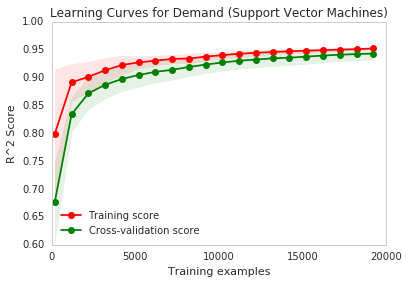

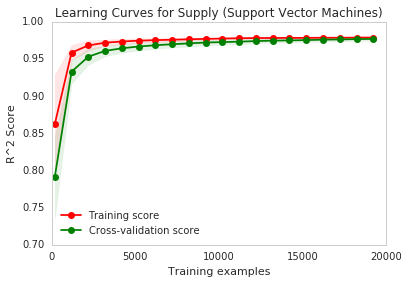


Training Demand Forecaster - Support Vector Machines

Train Size: 4000.000 Train Score: 0.959 Test Score: 0.770
Train Size: 8000.000 Train Score: 0.955 Test Score: 0.761
Train Size: 12000.000 Train Score: 0.946 Test Score: 0.815
Train Size: 16000.000 Train Score: 0.948 Test Score: 0.811
Train Size: 20000.000 Train Score: 0.954 Test Score: 0.913
Train Size: 24024.000 Train Score: 0.955 Test Score: 0.913

Training Supply Forecaster - Support Vector Machines

Train Size: 4000.000 Train Score: 0.978 Test Score: 0.809
Train Size: 8000.000 Train Score: 0.969 Test Score: 0.802
Train Size: 12000.000 Train Score: 0.972 Test Score: 0.911
Train Size: 16000.000 Train Score: 0.972 Test Score: 0.909
Train Size: 20000.000 Train Score: 0.978 Test Score: 0.972
Train Size: 24024.000 Train Score: 0.979 Test Score: 0.973


In [121]:
from sklearn.svm import SVR

# Linear Regression defaults to R^2 score
generate_learningcurves(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                        r_alg=SVR(), a_alg=SVR(), alg_name="Support Vector Machines")

generate_traintestscores(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                         rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                         r_alg=SVR(), a_alg=SVR(), alg_name="Support Vector Machines")

In [125]:
# Print Scores   
r_gs = SVR().fit(X=rX_train, y=ry_train)
a_gs = SVR().fit(X=aX_train, y=ay_train)

gap_estimate(rX_train=rX_train, rX_test=rX_test, aX_train=aX_train, aX_test=aX_test, 
             r_fitfunc=r_gs, a_fitfunc=a_gs)



DEMAND FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	491.39		0.96		6.17
TEST      	1502.18		0.91		2.56


SUPPLY FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	146.40		0.98		4.81
TEST      	223.51		0.97		1.99


GAP FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	329.72		0.73		4.35
TEST      	1105.27		0.66		1.87


# LINEAR REGRESSION

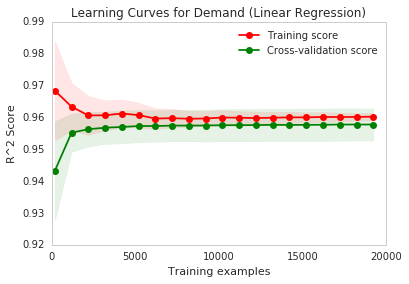

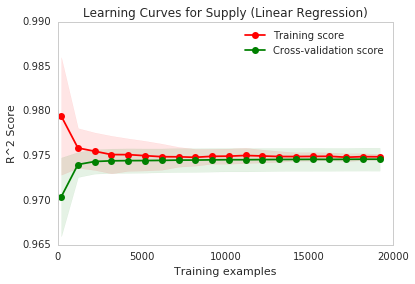


Training Demand Forecaster - Linear Regression

Train Size: 4000.000 Train Score: 0.951 Test Score: 0.957
Train Size: 8000.000 Train Score: 0.945 Test Score: 0.956
Train Size: 12000.000 Train Score: 0.948 Test Score: 0.955
Train Size: 16000.000 Train Score: 0.950 Test Score: 0.955
Train Size: 20000.000 Train Score: 0.958 Test Score: 0.956
Train Size: 24024.000 Train Score: 0.960 Test Score: 0.956

Training Supply Forecaster - Linear Regression

Train Size: 4000.000 Train Score: 0.970 Test Score: 0.977
Train Size: 8000.000 Train Score: 0.959 Test Score: 0.976
Train Size: 12000.000 Train Score: 0.964 Test Score: 0.977
Train Size: 16000.000 Train Score: 0.964 Test Score: 0.977
Train Size: 20000.000 Train Score: 0.974 Test Score: 0.977
Train Size: 24024.000 Train Score: 0.975 Test Score: 0.977


In [80]:
from sklearn.linear_model import LinearRegression

# Linear Regression defaults to R^2 score
generate_learningcurves(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                        r_alg=LinearRegression(), a_alg=LinearRegression(), alg_name="Linear Regression")

generate_traintestscores(rX_train=rX_train, ry_train=ry_train, aX_train=aX_train, ay_train=ay_train,
                         rX_test=rX_test, ry_test=ry_test, aX_test=aX_test, ay_test=ay_test,
                         r_alg=LinearRegression(), a_alg=LinearRegression(), alg_name="Linear Regression")



DEMAND FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	439.64		0.96		0.59
TEST      	754.20		0.96		0.57


SUPPLY FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	175.11		0.97		0.47
TEST      	191.11		0.98		0.46


GAP FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	249.27		0.80		0.74
TEST      	513.36		0.84		0.72

Train error correlation matrix:
             district_id       num_day     time_slot      week_day    demand  \
district_id     1.000000  0.000000e+00  0.000000e+00  0.000000e+00 -0.152934   
num_day         0.000000  1.000000e+00  0.000000e+00 -1.240347e-01  0.036766   
time_slot       0.000000  0.000000e+00  1.000000e+00  0.000000e+00  0.021066   
week_day        0.000000 -1.240347e-01  0.000000e+00  1.000000e+00 -0.022982   
demand         -0.152934  3.676635e-02  2.106621e-02 -2.298163e-02  1.000000   
supply         -0.172786  2.757070e-02  4.093527e-02 -1.346714e-02  0.954527   
gap            -0.044760  4.385271e-02 -3.442698e-02 -3.633431e-02  0.707939   
poi_cluster    -0.236061 -1.23

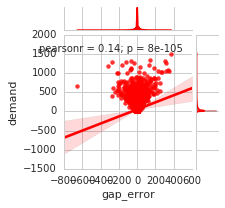

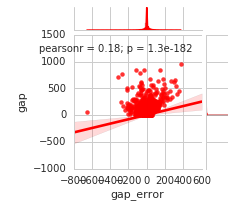

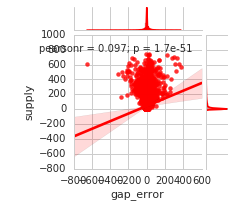

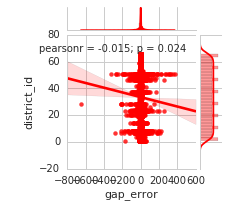

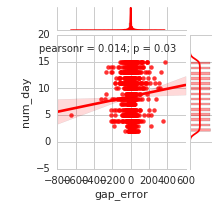

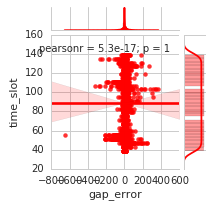

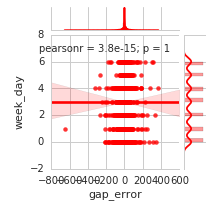

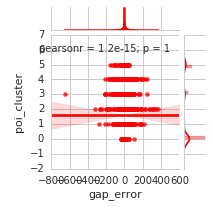

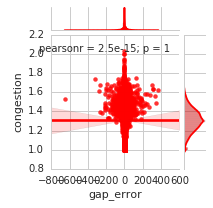


Train Error Joint Plot



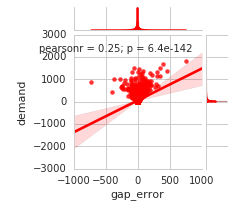

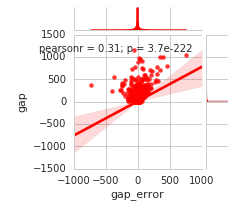

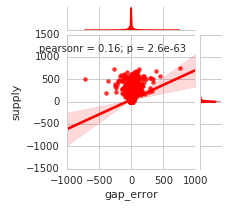

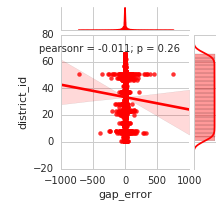

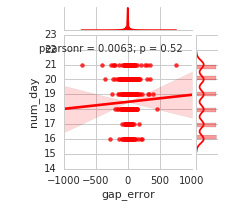

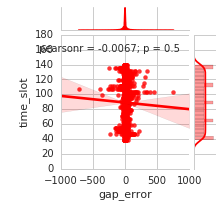

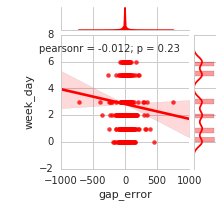

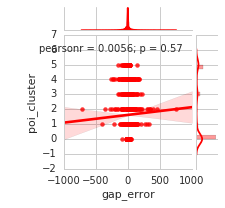

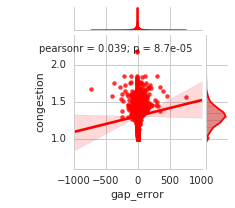

In [81]:
# Print Scores   
r_gs = LinearRegression().fit(X=rX_train, y=ry_train)
a_gs = LinearRegression().fit(X=aX_train, y=ay_train)

gap_estimate(rX_train=rX_train, rX_test=rX_test, aX_train=aX_train, aX_test=aX_test, 
             r_fitfunc=r_gs, a_fitfunc=a_gs)

# BENCHMARK - SIMPLE AVERAGE

In [24]:
# Return simple average of previous 3 time slots
def simple_average(df, t1, t2, t3):
    return df.apply(lambda r: ((r[t1] + r[t2] + r[t3]) / 3.0), axis=1)

# Define list of predictors for demand, supply
r_predictors = ['district_id', 'num_day', 'time_slot', 'demand_t-1', 'demand_t-2', 'demand_t-3'] 
a_predictors = ['district_id', 'num_day', 'time_slot', 'supply_t-1', 'supply_t-2', 'supply_t-3']

# Set arguments for gap forecasting function
kwargs = {"train_set": X_train, "test_set": X_test, 
          "demand_predictors": r_predictors, "supply_predictors": a_predictors,
          "rfit_func": simple_average, "rfit_args": ['demand_t-1','demand_t-2','demand_t-3'],
          "afit_func": simple_average, "afit_args": ['supply_t-1','supply_t-2','supply_t-3']}

gap_forecast(**kwargs)



DEMAND FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	784.82		0.93		3.24
TEST      	1159.29		0.93		1.36


SUPPLY FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	252.86		0.96		2.90
TEST      	273.82		0.97		1.22


GAP FORECASTING
		MEAN^2		R2		MAPE
TRAIN     	508.04		0.59		4.40
TEST      	833.59		0.74		1.89
